## Packages / Functions

We import the required packages first.
Furthermore, we define a cross-correlation function `my_xcorr2(x,y)` that conveniently returns the ACF with time shifts/lags $\kappa$ and specific scaling. This is not available out of the box with the `numpy` or `signal` packages.

In [8]:
# most common used packages for DSP, have a look into other scipy submodules
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal


def my_xcorr2(x, y, scaleopt='none'):
    N = len(x)
    M = len(y)
    kappa = np.arange(0, N+M-1) - (M-1)
    ccf = signal.correlate(x, y, mode='full', method='auto')
    if N == M:
        if scaleopt == 'none' or scaleopt == 'raw':
            ccf /= 1
        elif scaleopt == 'biased' or scaleopt == 'bias':
            ccf /= N
        elif scaleopt == 'unbiased' or scaleopt == 'unbias':
            ccf /= (N - np.abs(kappa))
        elif scaleopt == 'coeff' or scaleopt == 'normalized':
            ccf /= np.sqrt(np.sum(x**2) * np.sum(y**2))
        else:
            print('scaleopt unknown: we leave output unnormalized')
    return kappa, ccf

# Exercise 1: Auto Correlation for Sine Signal

## Task

Let us shortly consider continuous-time signals, since analytical calculus is a little bit simpler to show the intended key facts.

Calculate the continuous-time auto-correlation function

\begin{equation}
\phi_{xx}(\tau)=\lim\limits_{T\rightarrow\infty}\frac{1}{2T}\int\limits_{-T}^T x(t+\tau)\,x^*(t)\,\mathrm{d}t
\end{equation}

for the power signal (i.e. a signal with a finite mean power)

\begin{equation}
x(t)=A\cdot\sin(\omega\,t+\phi)
\end{equation}

with $A<\infty, \in \mathbb{R}$ and $\phi\in\mathbb{R}$ and $\omega\neq 0$.

## Solution

In the first step, just insert $x(t)$ into the ACF definition
\begin{equation}
\phi_{xx}(\tau)=\lim\limits_{T\rightarrow\infty}\frac{1}{2T}\int\limits_{-T}^T A^2\sin(\omega\,(t+\tau)+\phi)\,\sin(\omega\,t+\phi)\,\mathrm{d}t.
\end{equation}

With $\sin(\alpha)\sin(\beta)=\frac{1}{2}\left(\cos(\alpha-\beta)-\cos(\alpha+\beta)\right)$ we can derive

\begin{equation}
\begin{split}
\phi_{xx}(\tau)&=\lim_{T\to\infty}\frac{A^2}{4T}\int\limits_{-T}^T\cos(\omega\tau) - \cos(2\omega t+\omega\tau+2\phi)\,\mathrm{d}t\\
&=\lim\limits_{T\to\infty}\left(\frac{A^2}{4T}\cos(\omega\tau)\bigg[t\bigg]_{-T}^T-\underbrace{\frac{A^2}{4T}\int\limits_{-T}^T\cos(2\omega t+\omega\tau+2\phi)\mathrm{d}t}_{\to0\quad\text{for}\quad T\to\infty}\right) \\
&=\lim_{T\to\infty}\frac{A^2}{4T}\cos(\omega\tau)\cdot(T+T)\\
&=\lim_{T\to\infty}\frac{A^2}{2}\cos(\omega\tau)\\
&=\frac{A^2}{2}\cos(\omega\tau)
\end{split}
\end{equation}

The integral that tends $\to0\quad\text{for}\quad T\to\infty$ 

\begin{equation}
-\lim_{T\to\infty} \frac{A^2}{4 T} \int\limits_{-T}^{T} \cos(2 \omega t + a)\,\mathrm{d}t
\end{equation}

with $a = \omega \tau + 2 \phi$ can be evaluated as

\begin{equation}
\begin{split}
&-\frac{A^2}{4} \lim_{T\to\infty} \frac{1}{T} \int\limits_{-T}^{T} \cos(2 \omega t + a)\,\mathrm{d}t=
-\frac{A^2}{4} \lim_{T\to\infty} \frac{1}{T} \left[\frac{\sin(2 \omega t + a)}{2 \omega} \right]_{-T}^T\\
&-\frac{A^2}{4 \cdot 2 \omega} \lim_{T\to\infty} \frac{1}{T} \left(\sin(2 \omega T + a) - \sin(-2 \omega T + a)\right). 
\end{split}
\end{equation}

We observe that $-2 \leq \sin(2 \omega T + a) - \sin(-2 \omega T + a) \leq +2$, and thus bounded, which means
that $\lim_{T\to\infty} \frac{1}{T} (\dots) \to0$ and the pre-factors not longer matter.

## Interpretation

We derived that 

\begin{equation}
x(t)=A\cdot\sin(\omega\,t+\phi)
\end{equation}

has the auto correlation function

\begin{equation}
\phi_{xx}(\tau) = \frac{A^2}{2}\cos(\omega\tau).
\end{equation}

Let us plot this with an example of quasi-continuous signals, i.e. with very high sampling of the sine.

fs = 256.000000 Hz


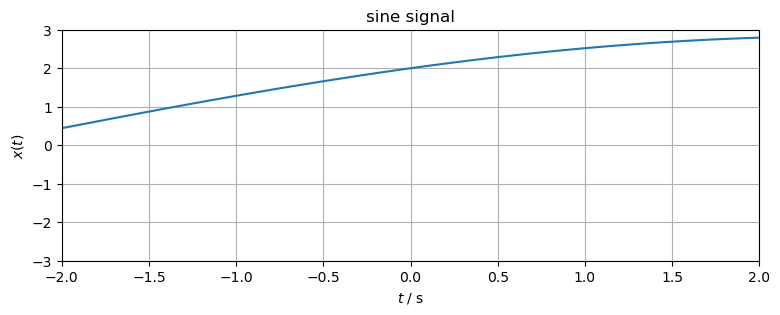

In [9]:
w = 2*np.pi/4  # f = 1 Hz
tend = 4  # theoretically the sine has infinite duration, here only 4s to plot
N = tend * 2**8  # 256 samples per period -> very sufficient oversampling
t = np.arange(N)/N * tend - tend//2  # here: [-2s...+2s)
A = np.sqrt(8)  # this choice matches an ACF amplitude of 4
phi = np.pi/4  # arbitrary choice, note that ACF is not affected by phase
x = A*np.sin(w*t + phi)  # create the sine signal

# estimate the sampling frequency from the time interval between two samples
fs = 1 / (t[1]-t[0])
print('fs = {0:f} Hz'.format(fs))
plt.figure(figsize=(9, 3))
plt.plot(t, x)
plt.xlim(-2, 2)
plt.ylim(-3, 3)
plt.xlabel(r'$t$ / s')
plt.ylabel(r'$x(t)$')
plt.title('sine signal')
plt.grid(True)

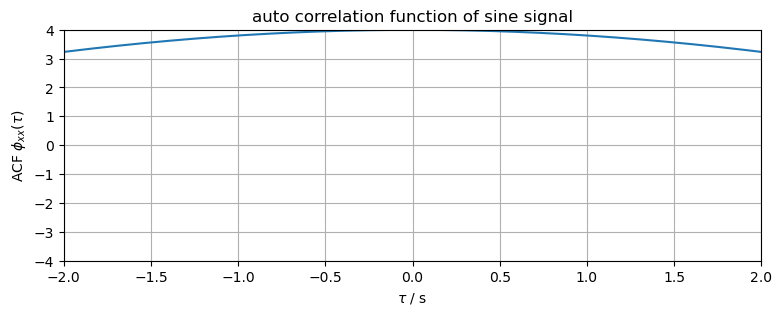

In [10]:
kappa, phixx = my_xcorr2(x, x, 'unbiased')

plt.figure(figsize=(9, 3))
plt.plot(kappa/fs, phixx)
plt.xlim(-2, 2)
plt.ylim(-4, 4)
plt.xlabel(r'$\tau$ / s')
plt.ylabel(r'ACF $\phi_{xx}(\tau)$')
plt.title('auto correlation function of sine signal')
plt.grid(True)

- We see that maximum **positive** auto correlation is obtained when sine signals exactly overlay each other. This is the case for $\tau= m \frac{2\pi}{\omega}$, $m\in\mathbb{Z}$, i.e. multiples of the sine signal's period.

- The maximum **negative** auto correlation is obtained when the two signals exhibit exact inverted polarity.
For a single sine signal this is the case for a phase shift of 180 deg or given in time by half of the period, thus at $\tau = m \frac{\pi}{\omega}$, $|m|\in 1,3,5,7,\dots$.

- Correlation is zero when the phase shift exhibits $\pm$90 deg, i.e. a quarter of a period.
Then the autocorrelation is evaluated for a sine and a cosine function (the sign of the cosine depends on the actual shift) of same frequency.
Since these two signals are known to be orthogonal, the zero correlation is not surprising, cf. the [Fourier series](http://mathworld.wolfram.com/FourierSeries.html).

# Exercise 2: CCFs

Let us deal with some correlations of discrete-time signals that can be conveniently discussed in terms of shifting and correlation properties.

Since we perform the same evaluation repeatedly, it is meaningful to program a little function that calculates and plots the correlation. See below:

In [11]:
def my_ccf_plot(x, y, scaleopt):
    kappa, ccf = my_xcorr2(x, y, scaleopt)
    plt.figure(figsize=(9, 9))

    plt.subplot(3, 1, 1)
    plt.plot(x, label='1st signal')
    plt.xlim(0, 2000)
    plt.ylim(-4, 4)
    plt.xlabel(r'$k$')
    plt.ylabel(r'$x[k]$')
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 1, 2)
    plt.plot(y, label='2nd signal')
    plt.xlim(0, 2000)
    plt.ylim(-4, 4)
    plt.xlabel(r'$k$')
    plt.ylabel(r'$y[k]$')
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 1, 3)
    plt.plot(kappa, ccf, label='correlation(1st,2nd)')
    plt.xlim(-1000, 1000)
    plt.ylim(-1, 1)
    plt.xlabel(r'$\kappa$')
    plt.ylabel(r'$\phi_{xy}[\kappa]$')
    plt.legend()
    plt.grid(True)

Here are the first subtasks:

a) Generate a sine signal $x[k]=\sin(\Omega_1k)$ for $0\leq k\leq N-1$ with $N=5000$ and $\Omega_1=5\cdot\frac{2\pi}{N}$.

b) Generate a sine signal $y[k]=\sin\left(\Omega_1k-\frac{\pi}{2}\right)$ with the same parameters as in a).

c) Calculate the unbiased estimator of the CCF between $x$ and $y$.

d) Plot $x[k]$, $y[k]$ and $\varphi_{xy}[\kappa]$.

e) Interpret $\varphi_{xy}[\kappa]$ with respect to the extreme cases when $x$ is shifted by $\pm\frac{\pi}{2}$ and not at all.

In [12]:
N = 5000
k = np.arange(N)
Omega1 = 5 * 2*np.pi/N
Omega2 = 20 * 2*np.pi/N  # needed later

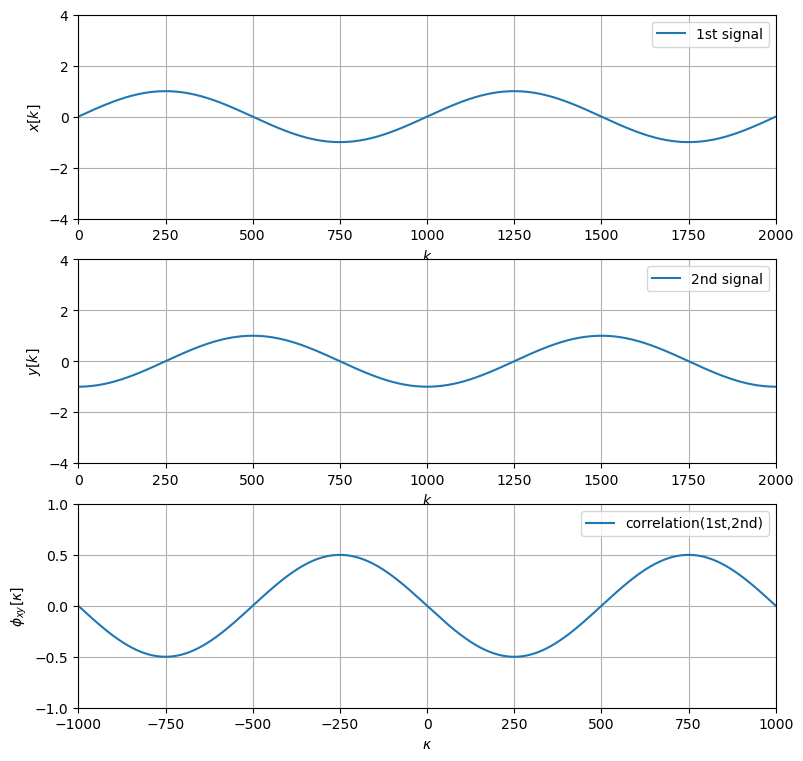

In [13]:
# a)
x = np.sin(Omega1*k)
# b)
y = np.sin(Omega1*k - np.pi/2)
# c) and d)
my_ccf_plot(x, y, scaleopt='unbiased')

Interpretation for subtask e)

Recall

\begin{equation}
\varphi_{xy}[\kappa]=\frac{1}{N}\sum\limits_{k=0}^{N-1} x[k+\kappa]\cdot y^*[k] = \frac{1}{N}\sum\limits_{k=0}^{N-1} x[k]\cdot y^*[k-\kappa].
\end{equation}

Then we can state:
- Period is 1000 samples, so phase shift of $\frac{\pi}{2}$ corresponds to 250 samples
- For $\kappa=0$ we have a positive sine signal and a negative cosine signal to be correlated. Since these two sequences are orthogonal, the CCF is zero here.
- ACF is also periodic, it is a negative sine signal actually
- If $x$ is shifted by $\kappa=-250$, i.e. to the right: signals lie on top of each other $\to$ maximum value in the ACF.
- If $y$ is shifted by $\kappa=-250$, i.e.  to the left: signals lie on top of each other $\to$ maximum value in the ACF.
- If $x$ is shifted by $\kappa=+250$, i.e.  to the left: signals are exactly out of phase $\to$ minimum value in the ACF.
- If $y$ is shifted by $\kappa=+250$, i.e.  to the right: signals are exactly out of phase $\to$ minimum value in the ACF.


Subtask f) Repeat the previous steps a) to e) for $y[k]=x[k]$, i.e. generate the ACF $\varphi_{xx}[\kappa]$.

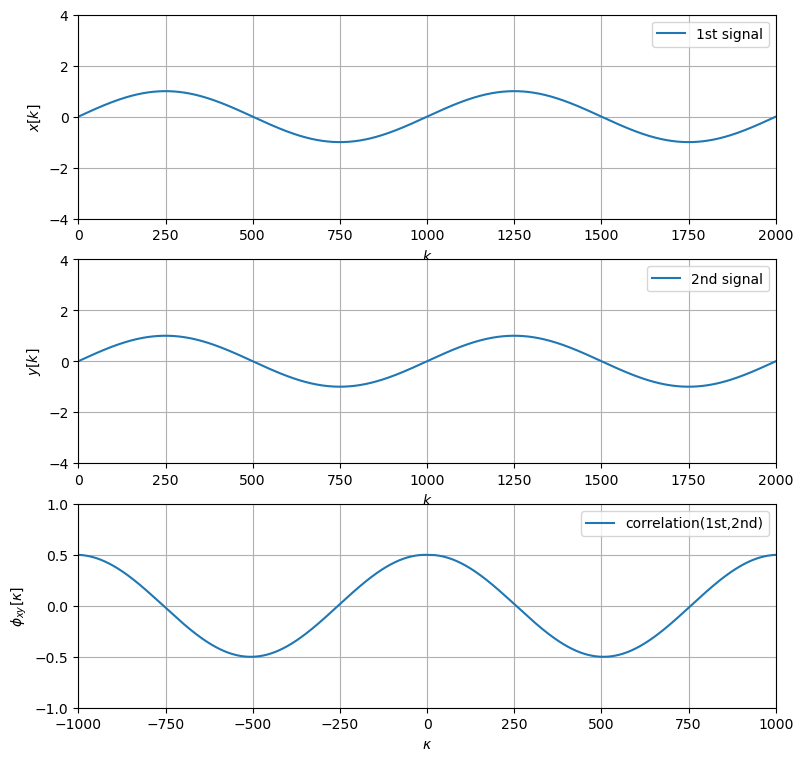

In [14]:
# f)
x = np.sin(Omega1*k)
y = x
my_ccf_plot(x, y, scaleopt='unbiased')

We see the same ACF characteristics as in exercise 1.
Full period is 1000 samples, in-phase case, positive maximum correlation.
Half period is 500 samples, out-of-phase case, negative maximum correlation.
Quarter period is 250 samples, orthogonal case, zero correlation.

Subtask g) Repeat the previous steps  a) to e) for the signals $x[k]=\sin(\Omega_1k)$ with $\Omega_1=5\cdot\frac{2\pi}{N}$ and $y[k]=\sin(\Omega_2k)$ with $\Omega_2=20\cdot\frac{2\pi}{N}$.

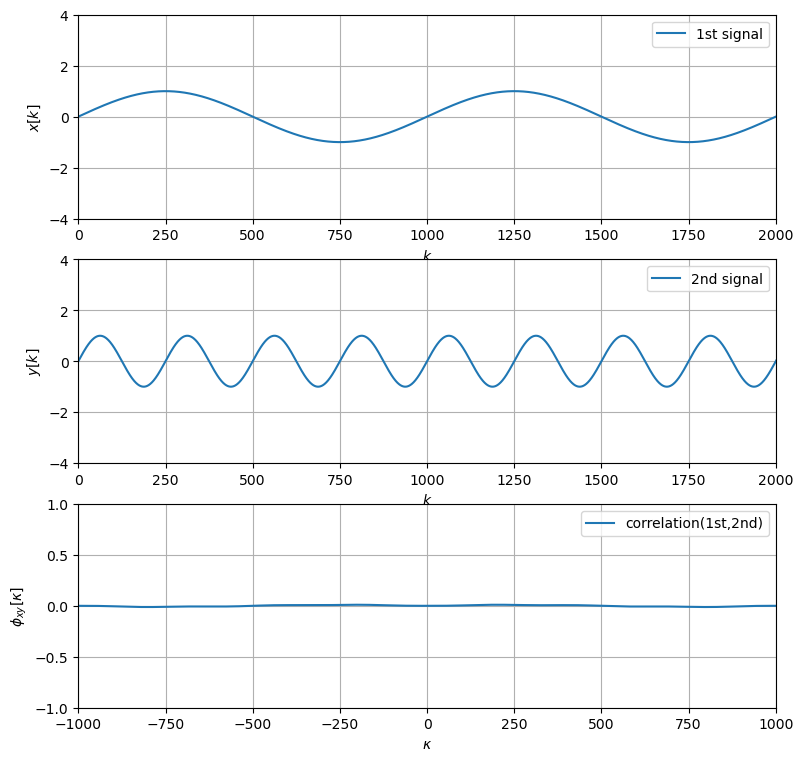

In [15]:
# g)
x = np.sin(Omega1*k)
y = np.sin(Omega2*k)
my_ccf_plot(x, y, scaleopt='unbiased')

The CCF is zero for all $\kappa$.
The signals correspond to harmonics in a Fourier series (when considering time-continuous signals) or a DFT.
In our case we could think of dealing with a DFT of length $N$, where we created sine signals for the 
5th and 20th DFT eigenfrequency.

Recall: It is a key feature of DFT that the $\mathrm{e}^{\mathrm{j}\frac{2\pi}{N}k\mu}$ DFT eigensignals are orthogonal, i.e.

\begin{equation}
\frac{1}{N}\sum_{k}^{N-1}\mathrm{e}^{\mathrm{j}\frac{2\pi}{N}k\mu_1} \cdot\mathrm{e}^{\mathrm{j}\frac{2\pi}{N}k\mu_2}=
\begin{cases}
1\quad\mathrm{for}\quad\mu_1=\mu_2\\
0\quad\mathrm{for}\quad\mu_1\neq\mu_2
\end{cases}
\end{equation}

For the case of $\mu_1\neq\mu_2$, a time shift by arbitrary $\kappa$ does not change the result of zero correlation:

\begin{equation}
\frac{1}{N}\sum_{k}^{N-1}\mathrm{e}^{\mathrm{j}\frac{2\pi}{N}(k+\kappa)\mu_1} \cdot\mathrm{e}^{\mathrm{j}\frac{2\pi}{N}k\mu_2}=0\quad\mathrm{if}\quad\mu_1\neq\mu_2.
\end{equation}

For the case of $\mu_1=\mu_2$, we can observe that for arbitrary $\kappa$

\begin{equation}
\bigg|\frac{1}{N}\sum_{k}^{N-1}\mathrm{e}^{\mathrm{j}\frac{2\pi}{N}(k+\kappa)\mu_1} \cdot\mathrm{e}^{\mathrm{j}\frac{2\pi}{N}k\mu_2}\bigg|=1\quad\mathrm{if}\quad\mu_1=\mu_2
\end{equation}
holds.

The case plotted above with the two sine signals is just a special case of evaluating only the imaginary part of $\mathrm{e}^{\mathrm{j}\frac{2\pi}{N}k\mu}$-signals for the CCF.

Subtask h) Generate a white noise signal of length $N$, whose amplitude values are drawn from the standard normal distribution (i.e. ideally $\mu_x=0, \sigma^2=1$, $\varphi_{xx}=\delta[\kappa]$, $\Phi_{xx}(\mathrm{e}^{\mathrm{j}\Omega})=1$ holds).

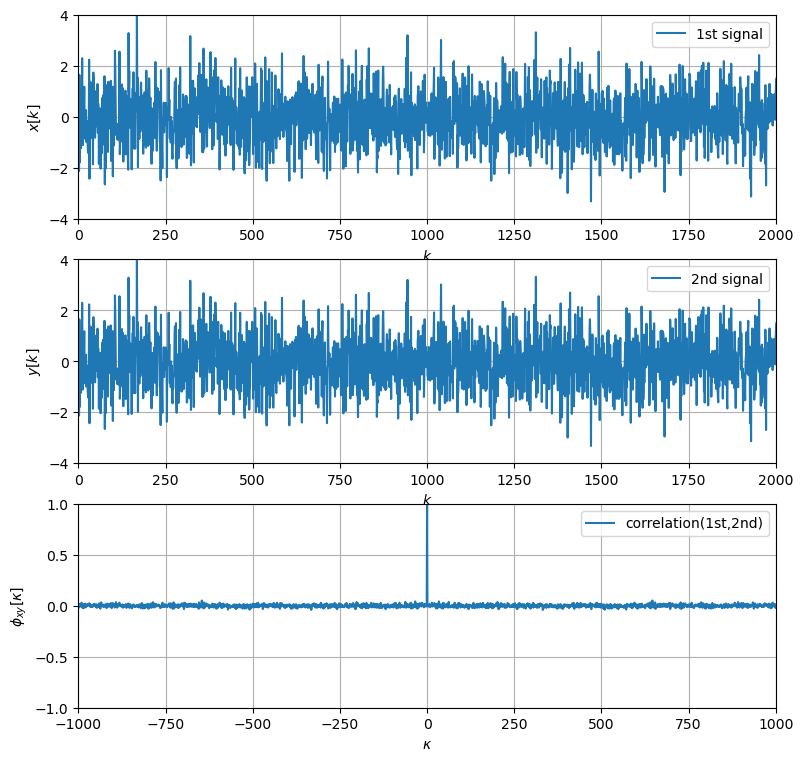

In [16]:
# h)
np.random.seed(2)  # arbitrary choice
x = np.random.randn(N)
y = x
my_ccf_plot(x, y, scaleopt='biased')

We see that the ACF is a Dirac-like function, not ideally a Dirac since we are dealing with finite length sequences and thus only an estimator for the ACF based on the random sample function $x=y$.

We will deal with this Dirac property a lot in the subsequent exercises.

# Exercise 3: ACF of a Short Sequence

## Task

- Evaluate the ACF 

\begin{equation}
\varphi_{xx}[\kappa]=\frac{1}{N}\sum\limits_{k=0}^{N-1} x[k+\kappa]\cdot x^*[k]
\end{equation}

of the energy signal 

\begin{equation}
x[k] = \delta[k] + 2 \delta[k-1] -3 \delta[k-2].
\end{equation}

- Make a sketch of $x[k]$ and $\varphi_{xx}[\kappa]$.

- Calculate the signal energy from the ACF.

## Solution

We make sure that we get the equation right.

We have $N=3$.
A general time shift / lag by $\kappa$ can be written as

\begin{equation}
x[k+\kappa] = \delta[k+\kappa] + 2 \delta[k+\kappa-1] -3 \delta[k+\kappa-2].
\end{equation}

Then the sifting property of the Dirac can be used to find the actual values of the ACF as follows (note that we don't need the summation equation since the Dirac representation is already a sum).

For $\kappa=0$ we get

\begin{equation}
\varphi_{xx}[\kappa=0] = \frac{1}{3} (\delta[k+0] + 2 \delta[k+0-1] -3 \delta[k+0-2]) \cdot (\delta[k] + 2 \delta[k-1] -3 \delta[k-2]) = \frac{1}{3}(1^2 + 2^2 + (-3)^2) = \frac{14}{3} = 4.6667
\end{equation}

For $\kappa=-1$ we get

\begin{equation}
\varphi_{xx}[\kappa=-1] = \frac{1}{3} (\delta[k-1] + 2 \delta[k-1-1] -3 \delta[k-1-2]) \cdot (\delta[k] + 2 \delta[k-1] -3 \delta[k-2]) = \frac{1}{3}(1\cdot2 + 2\cdot(-3)) = \frac{-4}{3} = -1.333
\end{equation}

For $\kappa=-2$ we get

\begin{equation}
\varphi_{xx}[\kappa=-2] = \frac{1}{3} (\delta[k-2] + 2 \delta[k-2-1] -3 \delta[k-2-2]) \cdot (\delta[k] + 2 \delta[k-1] -3 \delta[k-2]) = \frac{1}{3}(1\cdot (-3)) = \frac{-3}{3} = -1
\end{equation}

Of course, the results are also obtained by drawing the two signals on a paper, shift one by a certain $\kappa$, multiply the values that overlap and sum them up (just as we learned for convolution but without the time reversal step).

From above we know that

\begin{equation}
\varphi_{xx}[\kappa]=\varphi^*_{xx}[-\kappa]
\end{equation}

and since $\varphi_{xx}[\kappa]\in\mathbb{R}$ we just deal with axial-symmetry with respect to $\kappa=0$

\begin{equation}
\varphi_{xx}[\kappa]=\varphi_{xx}[-\kappa].
\end{equation}

Thus,

\begin{equation}
\varphi_{xx}[\kappa=+2] = -1
\end{equation}

and

\begin{equation}
\varphi_{xx}[\kappa=+1] = -\frac{4}{3},
\end{equation}

which could be also be derived when using the manual calculus with the Dirac sifting that was deployed for $\kappa=0,-1,-2$.

For completeness we should state that 

\begin{equation}
\varphi_{xx}[\kappa] = 0\quad\mathrm{for}\quad |\kappa|>2.
\end{equation}

Let us plot the signal $x[k]$ and $\varphi_{xx}[\kappa]$.

-1.000000, -1.333333, 4.666667, -1.333333, -1.000000, 

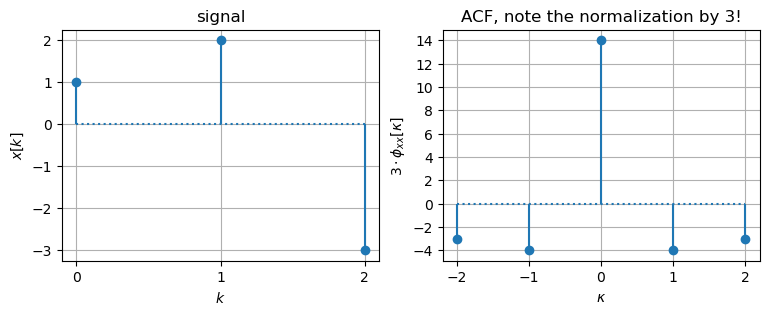

In [17]:
x = (+1., +2., -3.)
kappa, acf = my_xcorr2(x, x, 'biased')  # use own function defined above

for i in acf:
    print('{:f}'.format(i), end=', ')

plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.stem(x, basefmt='C0:')
plt.xticks(np.arange(0, 3))
plt.yticks(np.arange(-3, 3, 1))
plt.xlabel(r'$k$')
plt.ylabel(r'$x[k]$')
plt.title('signal')
plt.grid(True)

plt.subplot(1, 2, 2)
# note that we plot 3*ACF ! this gives simple integer results in the plot
plt.stem(kappa, acf*3, basefmt='C0:')
plt.xticks(np.arange(-2, 3))
plt.yticks(np.arange(-4, 16, 2))
plt.xlabel(r'$\kappa$')
plt.ylabel(r'$3 \cdot \phi_{xx}[\kappa]$')
plt.title('ACF, note the normalization by 3!')
plt.grid(True)

The signal energy is contained in 
\begin{equation}
\varphi_{xx}[\kappa=0]=\text{E}\left\{x[k]\cdot x[k]\right\}=\sigma_x^2+\mu_x^2 = \frac{14}{3}.
\end{equation}
Trivial fact, but worth to recapitulate: this is always a positive number.

# Exercise 4: Auto Correlation Function of LTI System's Output

## Task

An LTI system with the DTFT transfer function

\begin{equation}
H(\mathrm{e}^{\mathrm{j}\Omega})=\begin{cases}
	1, & |\Omega|<\Omega_c\\
	0, & \Omega_c\leq|\Omega|\leq\pi
\end{cases}
\end{equation}

for $\Omega_c > 0$ is excited by white noise $x[k]$ that exhibits the input (auto)-PSD $\Phi_{xx}(\mathrm{e}^{\mathrm{j}\Omega}) = \Phi_0$.
We assume that $x[k]$ is drawn from a stationary, ergodic random process.

- Make a sketch of the amplitude response of the transfer function and characterize the system characteristics.
- Calculate the ACF, the linear mean and the variance of the output signal $y[k]$.

## Solution

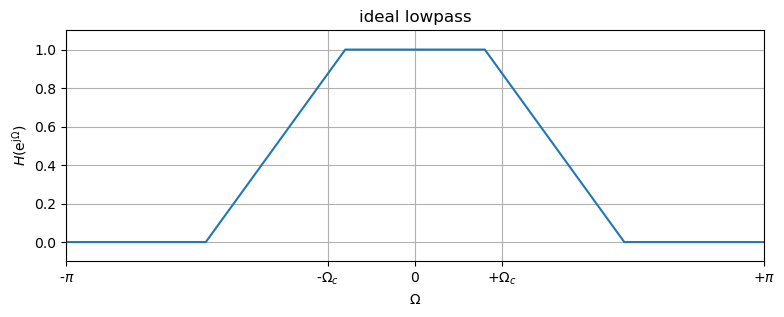

In [19]:
Omegac = np.pi/4  # arbitrary choice, must be <pi
N = 2**10
Omega = np.arange(N) * 2*np.pi/5 - np.pi  # [-pi...pi)
H = np.ones(N)
H[Omegac < np.abs(Omega)] = 0
plt.figure(figsize=(9, 3))
plt.plot(Omega, H)
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$H(\mathrm{e}^{\mathrm{j}\Omega})$')
plt.title('ideal lowpass')
plt.xticks([-np.pi, -Omegac, 0, +Omegac, +np.pi],
           [r'-$\pi$', r'-$\Omega_c$', '0', r'+$\Omega_c$', r'+$\pi$'])
plt.xlim(-np.pi, +np.pi)
plt.ylim(-0.1, 1.1)
plt.grid(True)

- ACF of output: 

Make use of the Wiener-Lee theorem in DTFT domain

\begin{equation}
\begin{split}
\Phi_{yy}(\mathrm{e}^{\mathrm{j}\Omega})&=\Phi_{xx}(\mathrm{e}^{\mathrm{j}\Omega})\cdot|H(\mathrm{e}^{\mathrm{j}\Omega})|^2\\
&=\Phi_{0}\cdot|H(\mathrm{e}^{\mathrm{j}\Omega})|^2.
\end{split}
\end{equation}

The squared transfer function of LTI system is simply

\begin{equation}
|H(\mathrm{e}^{\mathrm{j}\Omega})|^2=\begin{cases}
	1, & |\Omega|<\Omega_c \\
	0, & \Omega_c\leq|\Omega|\leq\pi.
\end{cases}
\end{equation}

Make use of inverse DTFT

\begin{equation}
\begin{split}
\varphi_{yy}[\kappa]& \circ - \bullet \Phi_{yy}(\mathrm{e}^{\mathrm{j}\Omega})\\
\varphi_{yy}[\kappa]&=\frac{1}{2\pi}\int\limits_{-\pi}^\pi\Phi_{yy}(\mathrm{e}^{\mathrm{j}\Omega})\mathrm{e}^{\mathrm{j}\Omega\kappa}\mathrm{d}\Omega.
\end{split}
\end{equation}

Insert the given relations

\begin{equation}
\begin{split}
\varphi_{yy}[\kappa]&=\frac{\Phi_0}{2\pi}\int\limits_{-\Omega_c}^{\Omega_c}\mathrm{e}^{\mathrm{j}\Omega\kappa}\mathrm{d}\Omega \\
&=\frac{\Phi_0}{2\pi}\left[\frac{1}{\mathrm{j}\kappa}\mathrm{e}^{\mathrm{j}\Omega\kappa}\right]_{-\Omega_c}^{\Omega_c} \\
&=\frac{\Phi_0}{2\pi\mathrm{j}\kappa}\left(\mathrm{e}^{\mathrm{j}\Omega_c\kappa}-\mathrm{e}^{-\mathrm{j}\Omega_c\kappa}\right). 
\end{split}
\end{equation}

With $\sin(x)=\frac{1}{2\mathrm{j}}\left(\mathrm{e}^{\mathrm{j} x}-\mathrm{e}^{-\mathrm{j} x}\right)$ we can simplify and obtain our final result

\begin{equation}
\varphi_{yy}[\kappa]=\Phi_0\frac{\sin(\Omega_c\kappa)}{\kappa\pi}
\end{equation}

Rewritten to make a weighted sinc-function more obvious
\begin{equation}
\varphi_{yy}[\kappa]=\Phi_0\,\frac{\Omega_c}{\pi}\,\frac{\sin(\Omega_c\kappa)}{\Omega_c\kappa}
\end{equation}

- Linear mean of output:

For the output signal it is fair to assume that

\begin{equation}
E\{y[k] y[k+\kappa]\} = E\{y[k]\}\cdot E\{y[k+\kappa]\}\quad\mathrm{for}\quad \kappa\to \infty,
\end{equation}

meaning that the signal $y$ for $k$ and the time shift $\kappa$ are not correlated.
Since we applied a white noise that should exhibit this characteristics, the output signal fulfills this assumption as well, since it was only shaped by the ideal lowpass filter.
Furthermore the process is assumed to be stationary, which means that the mean $\mu_y[k]$ is not time-dependent.
Thus,
\begin{equation}
E\{y[k]\} = E\{y[k+\kappa]\} = \mu_y,
\end{equation}
which results in
\begin{equation}
\varphi_{yy}[\kappa] = E\{y[k]\}\cdot E\{y[k+\kappa]\} = \mu_y^2\quad\mathrm{for}\quad \kappa\to \infty.
\end{equation}
Applying results in the final result
\begin{equation}
\mu_y^2 = \varphi_{yy}[\kappa\to \infty]=\lim_{\kappa\to\infty}\Phi_0\frac{\sin(\Omega_c\kappa)}{\kappa\pi} = \frac{\mathrm{bounded}}{\infty} = 0.
\end{equation}

Since $\mu_x = 0$ by definition of our input signal, we should expect this $\mu_y=0$ for the output signal as well, since the low pass filter as LTI system will not create a DC offset.

- Variance of output:

Generally, the ACF evaluated at $\kappa=0$ contains the quadratic mean, this is $\varphi_{yy}[\kappa=0]=\sigma_y^2+\mu_y^2$. Evaluating this yields

\begin{equation}
\begin{split}
\varphi_{yy}[\kappa=0]&=\sigma_y^2+\mu_y^2\\
\sigma^2_y&=\varphi_{yy}[0]-\mu^2_y \\
&=\varphi_{yy}[0]-0 \\
&=\lim\limits_{\kappa\to0}\Phi_0\frac{\sin(\Omega_c\kappa)}{\kappa\pi} \\
&=\lim\limits_{\kappa\to0}\Phi_0\frac{\Omega_c\cos(\Omega_c\kappa)}{\pi} \\
&=\Phi_0\frac{\Omega_c}{\pi}
\end{split}
\end{equation}

## Interpretation

- The Dirac ACF of input $\varphi_{xx}[\kappa]=\Phi_0 \delta[\kappa]$ is shaped to the output ACF $\varphi_{yy}[\kappa] = \Phi_0\frac{\sin(\Omega_c\kappa)}{\kappa\pi}$, i.e. a sinc-like shape.
This is typical for lowpass filter characteristics.

- The squared mean of input $\mu_x^2 = \varphi_{xx}[\kappa\to\infty]=\lim_{\kappa\to\infty}\Phi_0 \delta[\kappa]=0$ tells us that the input signal is mean free (DC free).
Since, the (time-independent) means of input/output signal are linked by $\mu_y = \mu_x \cdot H(\mathrm{e}^{\mathrm{j}\Omega})\big|_{\Omega=0}$, we obtain $\mu_y=0$ here. Note that in this example, this result is independent of the specific $H(\mathrm{e}^{\mathrm{j}\Omega})\big|_{\Omega=0}$.

- If $\Omega_c=\pi$, i.e. no low-pass characteristic at all, the complete power is transmitted through the system.
For this case, verify that $h[k] = \delta[k]$, which furthermore implies $y = x$, $\varphi_{yy} = \varphi_{xx}$.

- For $\Omega_c<\pi$, i.e. certain low-pass characteristic, only the fraction $\frac{\Omega_c}{\pi}$ of the whole power $\Phi_0$ is transmitted.

- Plot $\varphi_{yy}[\kappa] = \Phi_0\frac{\sin(\Omega_c\kappa)}{\kappa\pi}$ by yourself for different $0\leq \Omega_c\leq \pi$. What should be expected and is this reflected by the plots?

# Exercise 5: Transfer Function of LTI System, Output PSD

This exercise is very similar to the exercise 4, just that the LTI system is slightly more complicated and we discuss the spectral domain in more detail. The key principles remain the same, since we are again dealing with white noise input signal.

## Task

Calculate the PSD $\Phi_{yy}(\mathrm{e}^{\mathrm{j}\Omega})$ of the output signal $y[k]=x[k]\ast h[k]$. Make a sketch of the PSD $\Phi_{yy}(\Omega)$ for $0\leq\Omega<2\pi$.

- $x[k]$ is a stationary random input signal for which the (ideal) auto-correlation function is given as

\begin{equation}
\varphi_{xx}[\kappa]=\sigma_x^2\cdot\delta[\kappa]
\end{equation}

- the impulse response describing the LTI system is given as

\begin{equation}
h[k]=\left(\frac{3}{4}\right)^k\cdot\epsilon[k]
\end{equation}

In signals & systems we learned how to discuss the system characteristics in terms of impulse/step response, frequency response, pole/zero plot, bode plot.
We will need some of this stuff here again.

## Solution

We make use of the Wiener-Lee theorem, introduce the filter-ACF and find the links in spectral (DTFT) domain:

\begin{equation}
\varphi_{yy}[\kappa]=\varphi_{hh}[\kappa]\ast\varphi_{xx}[\kappa]=(h[\kappa]\ast h^*[-\kappa])\ast\varphi_{xx}[\kappa] \circ - \bullet \Phi_{yy}(\mathrm{e}^{\mathrm{j}\Omega})=|H(\mathrm{e}^{\mathrm{j}\Omega})|^2\cdot\Phi_{xx}(\mathrm{e}^{\mathrm{j}\Omega}).
\end{equation}

We see, that for solving $\Phi_{yy}(\mathrm{e}^{\mathrm{j}\Omega})$, we need $\Phi_{xx}(\mathrm{e}^{\mathrm{j}\Omega})$ and $|H(\mathrm{e}^{\mathrm{j}\Omega})|^2$.

The (auto)-PSD for input signal $x$ is with $\delta[k] \circ - \bullet 1$ derived as

\begin{equation*}
\Phi_{xx}(\mathrm{e}^{\mathrm{j}\Omega})=\text{DTFT}\{\varphi_{xx}[\kappa]\}=\text{DTFT}\{\sigma_x^2\cdot\delta[\kappa]\}=\sigma_x^2.
\end{equation*}

The squared magnitude of the transfer function can be derived by the DTFT of the impulse response $h[k]$.
The well known relation (have a look at signals and systems lecture / exercise) 

\begin{equation}
\text{DTFT}\{a^k\cdot\epsilon[k]\}=\frac{1}{1-a\cdot\mathrm{e}^{-\mathrm{j}\Omega}} \quad\text{for}\quad|a|<1
\end{equation}

can be used to find that

\begin{equation}
h[k] \circ - \bullet H(\mathrm{e}^{\mathrm{j}\Omega}) = \frac{1}{1-\frac{3}{4}\cdot\mathrm{e}^{-\mathrm{j}\Omega}}.
\end{equation}

Thus,

\begin{equation}
\begin{split}
\Phi_{yy}(\mathrm{e}^{\mathrm{j}\Omega})=&|H(\mathrm{e}^{\mathrm{j}\Omega})|^2\cdot\Phi_{xx}(\mathrm{e}^{\mathrm{j}\Omega})\\
\Phi_{yy}(\mathrm{e}^{\mathrm{j}\Omega})=&\left|\frac{1}{1-\frac{3}{4}\cdot\mathrm{e}^{-\mathrm{j}\Omega}}\right|^2 \cdot \sigma_x^2.
\end{split}
\end{equation}

Taking the usual mathematical transformations for complex numbers, we get

\begin{equation}
\begin{split}
\Phi_{yy}(\mathrm{e}^{\mathrm{j}\Omega})&=\frac{1}{\left|1-\frac{3}{4}\cos(\Omega)+\mathrm{j}\frac{3}{4}\sin(\Omega)\right|^2}\cdot\sigma_x^2\\
&=\frac{\sigma_x^2}{\left(1-\frac{3}{4}\cos(\Omega)\right)^2+\left(\frac{3}{4}\sin(\Omega)\right)^2}\\
&=\frac{\sigma_x^2}{1-2\cdot\frac{3}{4}\cos(\Omega)+\frac{9}{16}\cos^2(\Omega)+\frac{9}{16}\sin^2(\Omega)}\\
&=\frac{\sigma_x^2}{1-\frac{3}{2}\cos(\Omega)+\frac{9}{16}}\\
&=\frac{\sigma_x^2}{\frac{25}{16}-\frac{3}{2}\cos(\Omega)}
\end{split}
\end{equation}
which brings the final result
\begin{equation}
\begin{split}
\Phi_{yy}(\mathrm{e}^{\mathrm{j}\Omega})=\frac{2}{\frac{25}{8}-3\cos(\Omega)} \cdot \sigma_x^2.
\end{split}
\end{equation}

We should plot this normalized by $\sigma_x^2$, so in fact we plot $|H(\mathrm{e}^{\mathrm{j}\Omega})|^2$ then for our example.
This also gives us a nice way to validate our analytic calculus. Instead of the DTFT, we can describe the LTI system response in the $z$-domain, i.e. with its $z$-transform

\begin{equation}
h[k] \circ - \bullet H(z) = \frac{1}{1-\frac{3}{4} z^{-1}},
\end{equation}

where we recognize a recursive system with difference equation $a_0 y[k] = b_0 x[k] - a_1 y[k-1]$ using the coefficients $b_0=1$, $a_0=1$ and $a_1=-\frac{3}{4}$.
The `freqz()` function conveniently allows to evaluate the magnitude response of (non)-recursive systems, i.e. it evaluates the DTFT numerically with certain frequency resolution. Here we use $\Delta\Omega = \frac{2\pi}{256}$.

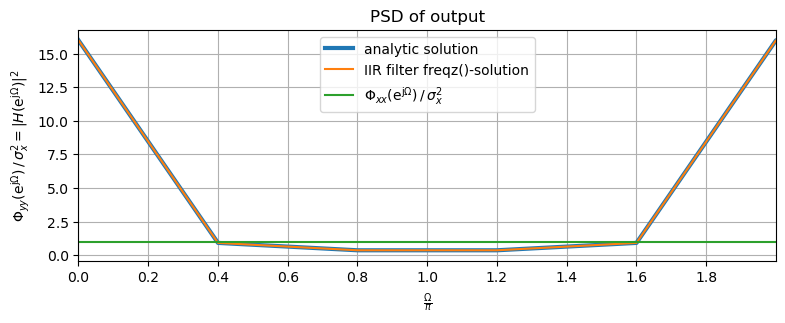

In [20]:
N = 2**8
Omega = np.arange(N) * 2*np.pi/5
H2 = 2 / (25/8 - 3*np.cos(Omega))  # analytic
Omega, H_IIR = signal.freqz(b=(1), a=(1, -3/4), worN=Omega)  # numeric

plt.figure(figsize=(9, 3))
plt.plot(Omega/np.pi, H2, lw=3, label='analytic solution')
plt.plot(Omega/np.pi, np.abs(H_IIR)**2, label='IIR filter freqz()-solution')
plt.plot(Omega/np.pi, Omega*0+1,
         label=r'$\Phi_{xx}(\mathrm{e}^{\mathrm{j}\Omega})\,/\,\sigma_x^2$')
plt.xlabel(r'$\frac{\Omega}{\pi}$')
plt.ylabel(
    r'$\Phi_{yy}(\mathrm{e}^{\mathrm{j}\Omega})\,/\,\sigma_x^2 = |H(\mathrm{e}^{\mathrm{j}\Omega})|^2$')
plt.title('PSD of output')
plt.xlim(0, 2)
plt.xticks(np.arange(0, 20, 2)/10)
plt.legend()
plt.grid(True)

## Interpretation

- In the plot we see, that analytic and numeric solution of $|H(\mathrm{e}^{\mathrm{j}\Omega})|^2$ are the same, so our calculus is very likely correct if we assume that freqz() is correctly implemented.

- Furthermore in the plot, we sketched the $\Phi_{xx}(\mathrm{e}^{\mathrm{j}\Omega})$ normalized by $\sigma_x^2$, which yields a line, i.e. magnitude one for all frequencies.

- We see that the input PSD $\Phi_{xx}(\mathrm{e}^{\mathrm{j}\Omega})$, which is constant over frequency, is spectrally shaped by the LTI system towards the output PSD $\Phi_{yy}(\mathrm{e}^{\mathrm{j}\Omega})$ .

- The output PSD $\Phi_{yy}(\mathrm{e}^{\mathrm{j}\Omega})$ is thus not longer constant over frequency, but amplified at lower frequencies and attenuated at higher frequencies.
This filter exhibits certain lowpass characteristics with a DC gain of 12 dB, -3 dB cut frequency approximately at $\Omega=\frac{1}{10} \pi$ and unity gain (0 dB) at about $\frac{4}{10} \pi$.


# Exercise 6: Impulse Response Estimation with Random Signal in Time Domain

This exercise deals with estimating the impulse response of an LTI system. We make use of the same concepts from the two previous exercises.

## Task

In this programming task we want to elaborate how to identify the impulse response of an LTI system with random signal in the time domain.
If white noise is used as input signal, the task becomes very convenient in terms of required signal processing steps. Thus, we

- generate white noise signal $x[k]$ drawn from gaussian PDF
- create finite impulse response $h[k]$ of a simple LTI system, i.e. a lowpass (in practice this would be unknown)
- apply convolution $y[k] = x[k] \ast h[k]$
- estimate the impulse response $\hat{h}[k]$ based on the concept of correlation functions.

## Solution

### Generate White Noise 

We aim at an ACF

$$\varphi_{xx}[\kappa]\approx \delta[\kappa]$$

and thus constant (Auto)-PSD for an input signal block $x[k]$ that was drawn
- from Gaussian PDF with zero mean and unit variance (i.e. standard normal distribution)
- with N=$2^{16}$ samples length

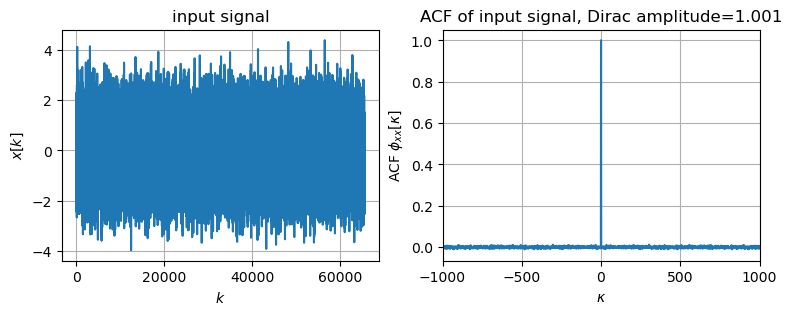

In [21]:
np.random.seed(2)  # arbitrary choice
Nx = 2**16
k = np.arange(Nx)
x = np.random.randn(Nx)
kappa, phixx = my_xcorr2(x, x, 'biased')  # we use biased here, i.e. 1/N normalization
idx = np.where(kappa==0)[0][0]

plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.plot(k, x)
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.title('input signal')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(kappa, phixx)
plt.xlim(-1000, +1000)
plt.xlabel('$\kappa$')
plt.ylabel('ACF $\phi_{xx}[\kappa]$')
plt.title('ACF of input signal, Dirac amplitude=%4.3f' % phixx[idx])
plt.grid(True)

### Create a Finite Impulse Response LTI System

- exemplary lowpass with FIR least squares design
- cut frequency 4.8 kHz
- sampling frequency 48 kHz
- 45 taps
- one tap weight is manipulated manually to break axial-symmetry on purpose

h[0]=0.014, DC=0.298 dB


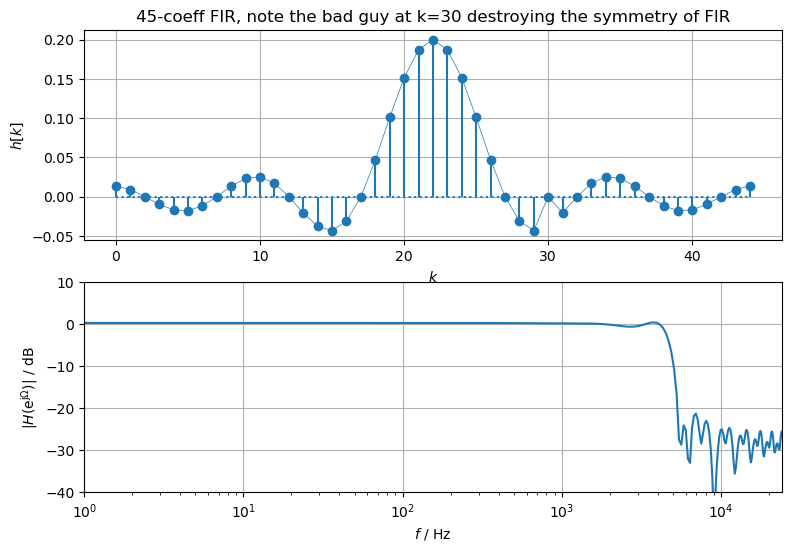

In [14]:
fs = 48000  # sampling frequency in Hz
fc = 4800  # cut frequency in Hz
number_fir_coeff = 45  # FIR taps
h = signal.firls(numtaps=number_fir_coeff,  # example for demo
                 bands=(0, fc, fc+1, fs//2),
                 desired=(1, 1, 0, 0),
                 fs=fs)
Nh = h.size
k = np.arange(Nh)
# make the IR unsymmetric by arbitray choice for demonstration purpose
idx = 30
h[idx] = 0  # then FIR is not longer linear-phase, see the spike in the plot

print('h[0]={0:4.3f}, DC={1:4.3f} dB'.format(h[0], 20*np.log10(np.sum(h))))

N = 2**8
Omega = np.arange(0, N) * 2*np.pi/N
_, H = signal.freqz(b=h, a=1, worN=Omega)

plt.figure(figsize=(9, 6))
plt.subplot(2, 1, 1)
plt.stem(k, h, basefmt='C0:')
plt.plot(k, h, 'C0-', lw=0.5)
plt.xlabel(r'$k$')
plt.ylabel(r'$h[k]$')
plt.title(str(Nh)+'-coeff FIR, note the bad guy at k=%d destroying the symmetry of FIR' % idx)
plt.grid(True)
plt.subplot(2, 1, 2)
plt.semilogx(Omega / (2*np.pi) * fs, 20*np.log10(np.abs(H)))
plt.xlabel(r'$f$ / Hz')
plt.ylabel(r'$|H(\mathrm{e}^{\mathrm{j}\Omega})|$ / dB')
plt.xlim(1, fs//2)
plt.ylim(-40, 10)
plt.grid(True)

## Convolution

In [15]:
y = np.convolve(x, h, mode='full')  # signal x through system h returns output y

## Estimate the Impulse Response by Cross Correlation

The (most simple, and in practice rather not longer used) method here is based on the fact that the ACF of the input signal is ideally a Dirac impulse.

In essence we deal with:

- CCF of $y[k]$ and $x[k]$ yields **either** $\varphi_{yx}$ **or** $\varphi_{xy}$ (note the index exchange) depending on the order of calling `my_xcorr2()`
- check $\varphi_{yx}[\kappa]=h[+\kappa]$
- check $\varphi_{xy}[\kappa]=h[-\kappa]$

More detailed, the relationships between CCF, ACF and IR are known from above

\begin{equation}
\begin{split}
\varphi_{yx}[\kappa]=&\varphi_{xx}[\kappa]\ast h[+\kappa]\\
\varphi_{xy}[\kappa]=&\varphi_{xx}[\kappa]\ast h^*[-\kappa].
\end{split}
\end{equation}

For $h\in\mathbb{R}$ this yields
\begin{equation}
\varphi_{xy}[\kappa]=\varphi_{xx}[\kappa]\ast h[-\kappa].
\end{equation}

For above assumption that the random input signal fulfills

$$\varphi_{xx}[\kappa]\approx \delta[\kappa]$$

we get
\begin{equation}
\begin{split}
\varphi_{yx}[\kappa]=\delta[\kappa]\ast h[+\kappa]\\
\varphi_{xy}[\kappa]=\delta[\kappa]\ast h[-\kappa]
\end{split}
\end{equation}

and since the Dirac impulse behaves neutral in convolution we have

\begin{equation}
\begin{split}
\varphi_{yx}[\kappa]=h[+\kappa]\\
\varphi_{xy}[\kappa]=h[-\kappa]
\end{split}
\end{equation}

as estimators for the unknown LTI system impulse response $h[k]$.

So, let us check the case $\varphi_{yx}[\kappa]=h[+\kappa]$ first:

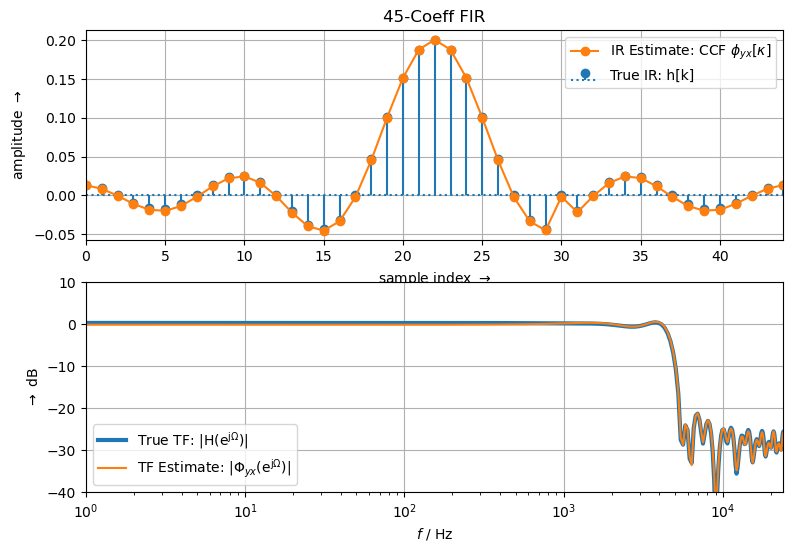

In [16]:
kappa, phiyx = my_xcorr2(y, x, 'biased')  # get cross correlation in order y,x

# find the index for kappa=0, the IR starts here
idx = np.where(kappa == 0)[0][0]
# cut out the IR, since we know the numtaps this is easy to decide here
h_est = phiyx[idx:idx+Nh] / len(y)
# get DTFT estimate of PSD
_, Phiyx = signal.freqz(b=h_est, a=1, worN=Omega)

plt.figure(figsize=(9, 6))
plt.subplot(2, 1, 1)
plt.stem(h, basefmt='C0:', label='True IR: h[k]')
plt.plot(kappa, phiyx / len(y), 'C1o-',
         label=r'IR Estimate: CCF $\phi_{yx}[\kappa]$')
plt.xlim(0, Nh-1)
plt.xlabel(r'sample index $\rightarrow$')
plt.ylabel(r'amplitude $\rightarrow$')
plt.title(str(Nh)+'-Coeff FIR')
plt.legend()
plt.grid(True)
plt.subplot(2, 1, 2)
plt.semilogx(Omega/2/np.pi*fs, 20*np.log10(np.abs(H)), lw=3,
             label=r'True TF: $|\mathrm{H}(\mathrm{e}^{\mathrm{j}\Omega})|$')
plt.semilogx(Omega/2/np.pi*fs, 20*np.log10(np.abs(Phiyx)),
             label='TF Estimate: $|\Phi_{yx}(\mathrm{e}^{\mathrm{j}\Omega})|$')
plt.xlabel(r'$f$ / Hz')
plt.ylabel(r'$\rightarrow$ dB')
plt.xlim(1, fs//2)
plt.ylim(-40, 10)
plt.legend()
plt.grid(True)

By interchanging the order for cross correlation, i.e. `my_xcorr2(x,y)`, 

$$\varphi_{xy}[\kappa]=h[-\kappa]$$

we obtain the mirrored impulse response.
To conveniently see this, we implemented the `h[30] = 0` manipulation, to make slightly IR asymmetric.

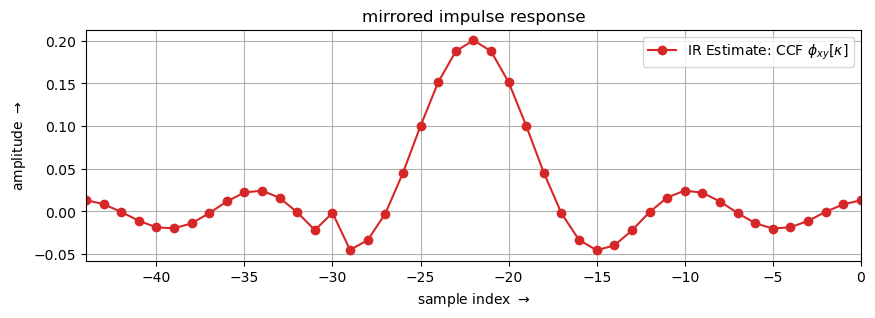

In [17]:
kappa, phixy = my_xcorr2(x, y, 'biased')  # get cross correlation x,y

plt.figure(figsize=(10, 3))
plt.plot(kappa, phixy/len(y), 'C3o-',
         label=r'IR Estimate: CCF $\phi_{xy}[\kappa]$')
plt.xlim(-(Nh-1), 0)
plt.xlabel(r'sample index $\rightarrow$')
plt.ylabel(r'amplitude $\rightarrow$')
plt.title('mirrored impulse response')
plt.legend()
plt.grid(True)

## Interpretation

The estimated impulse can be compared against the reference impulse response (we only can do this here, since we have built one for demonstration. In practice this response is of course unknown, and one needs to be sure about the chosen method to obtain a valid estimation.). 
We can take the absolute error on the impulse response itself, here as

\begin{equation}
e_h[k] = \hat{h}[k] - h[k]
\end{equation}

Furthermore, it is of interest how the magnitude spectrum (and in many applications also the phase) of the transfer function differs. We can establish an error in terms of relative dB

\begin{equation}
e_H(\mathrm{e}^{\mathrm{j}\Omega}) = 20 \log_{10}|\hat{H}(\mathrm{e}^{\mathrm{j}\Omega})| - 20 \log_{10}|H(\mathrm{e}^{\mathrm{j}\Omega})|.
\end{equation}

Let us plot these two errors below.

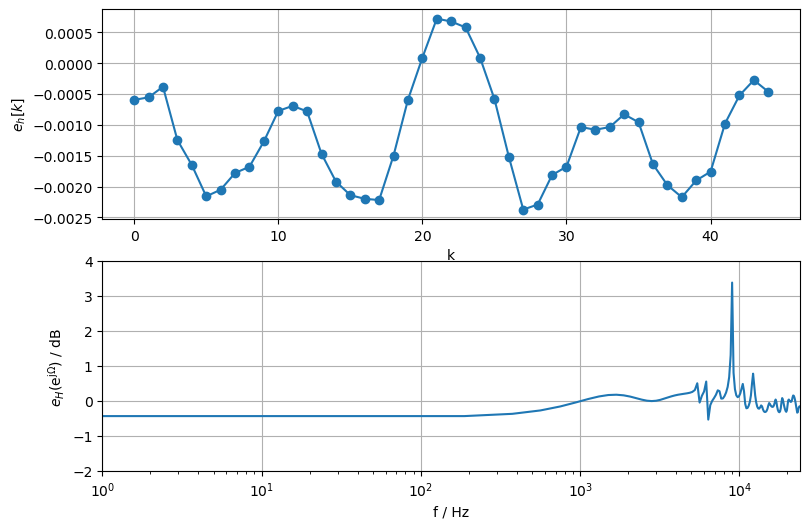

In [18]:
plt.figure(figsize=(9, 6))
plt.subplot(2, 1, 1)
plt.plot(h_est - h, 'o-')
plt.xlabel('k')
plt.ylabel(r'$e_h[k]$')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.semilogx(Omega / (2*np.pi) * fs, 20 *
             np.log10(np.abs(Phiyx)) - 20*np.log10(np.abs(H)))
plt.xlabel('f / Hz')
plt.ylabel(r'$e_H(\mathrm{e}^{\mathrm{j}\Omega})$ / dB')
plt.xlim(1, fs//2)
plt.ylim(-2, 4)
plt.grid(True)

Without an application in mind, we cannot tell if these errors are sufficiently small or too large.

However, we can observe for that specific example, that the error $e_h$ somehow follows the shape of the impulse response, i.e. a sinc-like pattern.
Furthermore, we can state that for low frequencies there is a constant offset about 0.5 dB in the magnitude spectrum, slowly decreasing to zero dB in the region of the cut frequency. Above the cut frequency (except the strong peak) the error is somehow 'noisy' around 0 dB.

We might play around with the length of the input signal and the specific seed of the random number generator, to obtain different pictures.
For example instead of `N = 2**16` check what happens with `N = 2**8`.
It is very likely that the estimated impulse response is not precise enough for any application, since the deviations to the reference are too large.

Make yourself comfortable, why and how the parameter `N` changes the result and how the assumption of *ACF of $x$ being a Dirac* is affected. 